## Estudo em dados sobre bolsistas de iniciação científica da UFRN

Um dos parâmetros para medir a qualidade de uma instituição de ensino, é o quanto ela investe em pesquisa e desenvolvimento, incentivando seus alunos a terem familiaridade com trabalhos científicos ainda na graduação. Desse modo, esse trabalho tem por objetivo fazer uma análise sobre os dados dos bolsistas de iniciação científica da UFRN e apresentar, de forma clara, algumas informações sobre eles.

Trabalho desenvolvido com base de dados abertos da UFRN
*http://dados.ufrn.br/

In [131]:
# Importar o Pandas
import pandas as pd

# Importar os dados de bolsistas-de-iniciacao-cientifica.csv
data = pd.read_csv("bolsistas-de-iniciacao-cientifica.csv", encoding = 'utf-8', sep = None, engine = 'python')

In [132]:
data.head()

,matricula,discente,titulo,codigo_projeto,ano,orientador,categoria,tipo_de_bolsa,linha_pesquisa,base_pesquisa,cota,inicio,fim,unidade,status
0,200504593,ABDON SILVA RIBEIRO DA CUNHA,Motivos de Adesão e Filiação ao Trabalho Volun...,PVE3275-2009,2009,WASHINGTON JOSE DE SOUSA,Iniciação Científica (IC),PIBIC,Análise e Avaliação de Políticas Públicas;;;,NaN,2009-2010,2009-08-01,2009-12-25 00:00:00,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEP...,FINALIZADO
1,200504593,ABDON SILVA RIBEIRO DA CUNHA,O agronegócio da carcinicultura no RN e a estr...,PVE334-2007,2007,MARIANA BALDI,Iniciação Científica (IC),PIBIC,Organizações e comportamento organizacional;;;,BASE DE ESTUDOS E PESQUISAS EM ESTRATÉGIAS E P...,2007-2008,2007-08-01,2008-07-31 00:00:00,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO
2,200504593,ABDON SILVA RIBEIRO DA CUNHA,Geração e disseminação da inovação na carcinic...,PVE2463-2008,2008,MARIANA BALDI,Iniciação Científica (IC),PIBIC,Organizações e comportamento organizacional,BASE DE ESTUDOS E PESQUISAS EM ESTRATÉGIAS E P...,2008-2009,2008-08-25,2008-11-06 13:35:24.877,DEPARTAMENTO DE CIÊNCIAS ADMINISTRATIVAS - DEP...,FINALIZADO
3,200504593,ABDON SILVA RIBEIRO DA CUNHA,O agronegócio da carcinicultura no RN e a estr...,PVE334-2006,2006,MARIANA BALDI,Iniciação Científica (IC),PROPESQ,Organizações e comportamento organizacional;;;,BASE DE ESTUDOS E PESQUISAS EM ESTRATÉGIAS E P...,2006-2007,2006-08-01,2007-07-31 00:00:00,CENTRO DE CIÊNCIAS SOCIAIS APLICADAS - CCSA,FINALIZADO
4,2011049415,ABEL LUIS DA SILVA NETO,Estudo de Antenas com Reflectarrays e suas Apl...,PVG6992-2013,2013,ADAILDO GOMES D ASSUNCAO,Iniciação Tecnológica (IT),PIBIT,"ANTENAS, PROPAGAÇÃO E COMUNICAÇÕES SEM FIO",GRUPO DE MICROONDAS E ANTENAS,2013-2014,2013-08-14,2014-06-26 00:00:00,DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES - DCO,PENDENTE DE RELATORIO


### Tratamento dos dados

In [133]:
#Colunas da matriz de dados
data.columns.values.tolist()

##Colunas dispensáveis para esse projeto: discente, código projeto

['matricula',
 'discente',
 'titulo',
 'codigo_projeto',
 'ano',
 'orientador',
 'categoria',
 'tipo_de_bolsa',
 'linha_pesquisa',
 'base_pesquisa',
 'cota',
 'inicio',
 'fim',
 'unidade',
 'status']

In [134]:
# Removendo-as...
data.drop(data.columns[1], axis=1, inplace=True)
data.drop(data.columns[2], axis=1, inplace=True)

In [135]:
#Número de entradas: 26473
data.info()
#Dados não obrigatórios: título, linha_pesquisa, base_pesquisa, cota, inicio, fim

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26473 entries, 0 to 26472
Data columns (total 13 columns):
matricula         26473 non-null int64
titulo            26464 non-null object
ano               26473 non-null int64
orientador        26473 non-null object
categoria         26473 non-null object
tipo_de_bolsa     26473 non-null object
linha_pesquisa    25610 non-null object
base_pesquisa     22210 non-null object
cota              26473 non-null object
inicio            26468 non-null object
fim               23323 non-null object
unidade           26473 non-null object
status            26473 non-null object
dtypes: int64(2), object(11)
memory usage: 2.6+ MB


In [136]:
#De modo a deixar a análise mais concisa, vamos fazer a análise dos dados dos ultimos 5 anos.

#Ordena dados por ano
data = data.sort_values(data.columns[2], ascending = True)
                 
#Dados dos últimos 5 anos
data = data[data['ano'] > 2012]

#Diminuição do número de dados: 11101 entradas
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11101 entries, 1668 to 14065
Data columns (total 13 columns):
matricula         11101 non-null int64
titulo            11101 non-null object
ano               11101 non-null int64
orientador        11101 non-null object
categoria         11101 non-null object
tipo_de_bolsa     11101 non-null object
linha_pesquisa    10693 non-null object
base_pesquisa     9121 non-null object
cota              11101 non-null object
inicio            11101 non-null object
fim               8015 non-null object
unidade           11101 non-null object
status            11101 non-null object
dtypes: int64(2), object(11)
memory usage: 1.2+ MB


In [137]:
data.head()

,matricula,titulo,ano,orientador,categoria,tipo_de_bolsa,linha_pesquisa,base_pesquisa,cota,inicio,fim,unidade,status
1668,2013047581,JOVENS TALENTOS - DIREITO,2013,ANA BEATRIZ FERREIRA REBELLO,Iniciação Científica (IC),JOVENS TALENTOS,NaN,NaN,JOVENS TALENTOS 2013-2014,2013-08-01,2014-07-31 00:00:00,PRÓ-REITORIA DE PESQUISA - PROPESQ,FINALIZADO
968,2014018584,Efeito de fatores ambientais no envelhecimento...,2013,JOSE DANIEL DINIZ MELO,Iniciação Científica (IC),PIBIC,Materiais compósitos poliméricos;;;,MATERIAIS COMPÓSITOS E CERÂMICOS,2014-2015,2014-08-09,2015-07-31 00:00:00,DEPARTAMENTO DE ENGENHARIA DE MATERIAIS - DEPT...,FINALIZADO
1639,2011043387,Fungos Micorrízicos Arbusculares em gradiente ...,2013,BRUNO TOMIO GOTO,Iniciação Científica (IC),PROPESQ,Biodiversidade vegetal e funcionamento de ecos...,Ecologia de Populações e Comunidades Vegetais ...,2014,2014-02-13,2015-07-31 00:00:00,DEPARTAMENTO DE BOTÂNICA E ZOOLOGIA - DBEZ/CB,FINALIZADO
1688,2012910227,Transferindo informações sobre arquitetura ecl...,2013,EDJA BEZERRA FARIA TRIGUEIRO,Iniciação Científica (IC),REUNI,Morfologia e história da arquitetura,MORFOLOGIA E USOS DA ARQUITETURA - MUsA,2013,2013-03-04,2013-06-19 00:00:00,DEPARTAMENTO DE ARQUITETURA - ARQ/CT,FINALIZADO
18079,2012961638,A Atenção Primária e o direito à saúde em Nata...,2013,EDLA HOFFMANN,Iniciação Científica (IC),NUPLAM,"Estado, Sociedade, Políticas Sociais e Direitos",Grupo de Estudos e Pesquisas em Questão Social...,2014,2015-04-07,2015-07-31 00:00:00,DEPARTAMENTO DE SERVIÇO SOCIAL - DESSO/CCSA,FINALIZADO


## Análise dos dados: Tipos de bolsa
Vamos verificar então a distribuição dos tipos de bolsas entre os alunos

In [187]:
tipos_bolsa = data['tipo_de_bolsa'].reset_index()

#Novo dataframe com quantidade de cada bolsa
tipos_bolsa['count'] = 0
tipos_bolsa = pd.DataFrame(results.groupby(['tipo_de_bolsa'])['count'].count()).reset_index()

In [195]:
tipos_bolsa.head()

,tipo_de_bolsa,count
0,BALCÃO,1
1,Bolsas de IC/IT -PICME,5
2,ECT,2
3,FUNTTEL,8
4,JOVENS TALENTOS,371


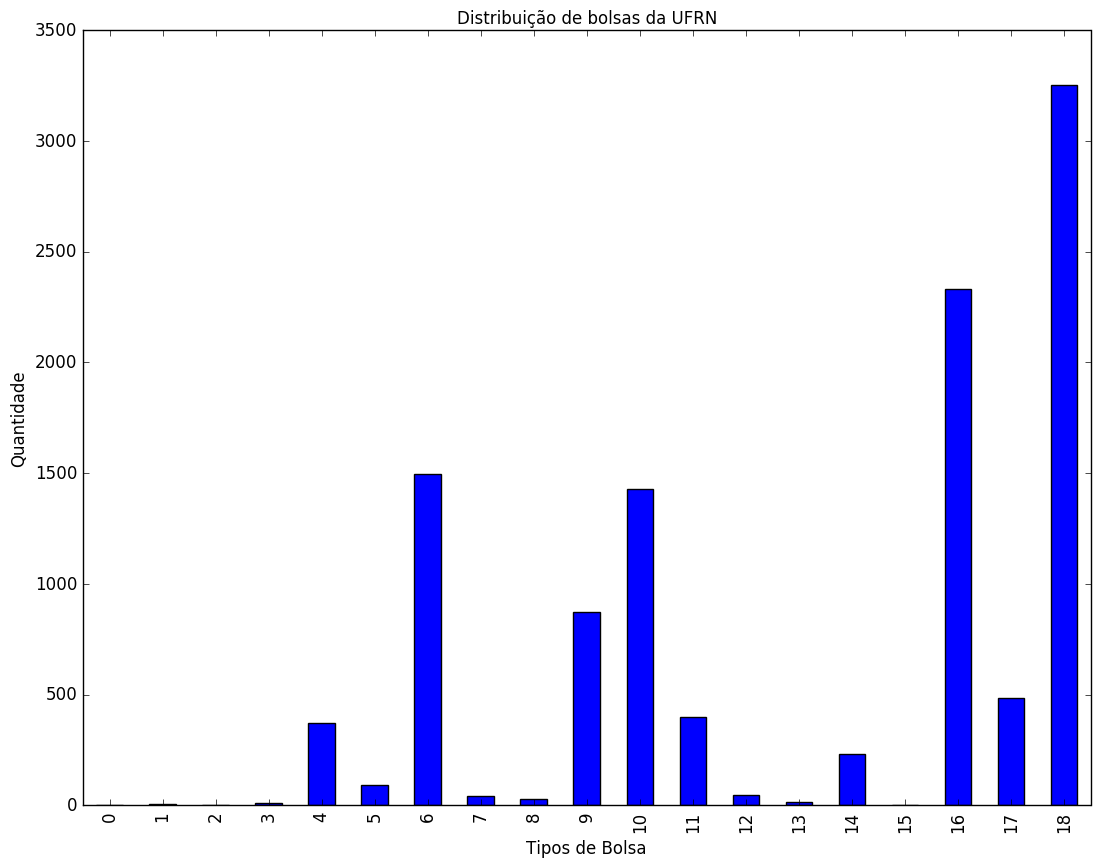

In [210]:
import matplotlib.pyplot as plt

ax = tipos_bolsa['count'].plot(kind='bar', title ="Distribuição de bolsas da UFRN", figsize=(13, 10), legend=False, fontsize=12)
ax.set_xlabel("Tipos de Bolsa", fontsize=12)
ax.set_ylabel("Quantidade", fontsize=12)
plt.show()